# HDF5 data playgroud
by Evan Su

* [HDF5](https://www.hdfgroup.org)
* [PyTables](https://www.pytables.org)
* [Oanda API](https://developer.oanda.com/rest-live-v20/introduction/)

In [1]:
from iridium.data.hdf5 import HDFData
import pandas as pd
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import Formatter, MaxNLocator
import numpy as np
from iridium.utils.trading_calendar import DataFrequency, ForexCalendar
from dateutil.tz import tzlocal
from pathlib import Path
from datetime import datetime

In [2]:
start = pd.Timestamp(year=2019,
                     month=10,
                     day=1,
                     tz=tzlocal())
end = pd.Timestamp(year=2019,
                   month=11,
                   day=1,
                   tz=tzlocal())
sample_data_path = str(Path().resolve().parent.parent.absolute()) + '/tests/resources/hdf5_samples/history.h5'
df = HDFData.read_hdf(instrument='EUR_USD', start=start, end=end, frequency='D', path=sample_data_path)

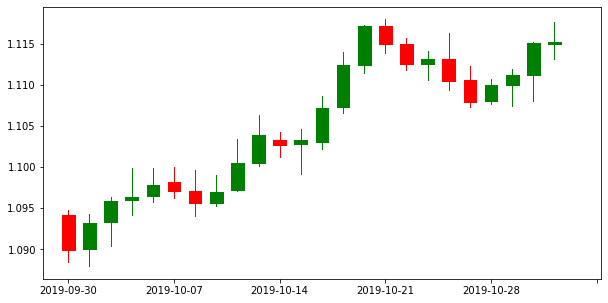

In [3]:
class TradeDateFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        """Return the label for time x at position pos"""
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return mdates.num2date(self.dates[ind]).strftime(self.fmt)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 5))
line_width = 0.6
date_list = [mdates.date2num(datetime.fromtimestamp(date.timestamp())) for date in df.index]
open_list = df.open.values
close_list = df.close.values
high_list = df.high.values
low_list = df.low.values
candlestick2_ohlc(
    ax=ax,
    opens=open_list,
    highs=high_list,
    lows=low_list,
    closes=close_list,
    width=line_width,
    colorup='green',
    colordown='red',
    alpha=1.0)
formatter = TradeDateFormatter(date_list)
ax.xaxis.set_major_formatter(formatter)

In [4]:
start_date = pd.Timestamp(
    year=2019,
    month=9,
    day=30,
    hour=7,
    tz=tzlocal())
end_date = pd.Timestamp(
    year=2019,
    month=10,
    day=5,
    hour=7,
    tz=tzlocal())
HDFData.read_hdf(instrument='EUR_USD', start=start_date, end=end_date, frequency='H1', path=sample_data_path)

,open,close,high,low,volume
2019-09-30 07:00:00+10:00,1.09420,1.09418,1.09438,1.09396,71.0
2019-09-30 08:00:00+10:00,1.09416,1.09446,1.09462,1.09404,156.0
2019-09-30 09:00:00+10:00,1.09444,1.09424,1.09444,1.09420,151.0
2019-09-30 10:00:00+10:00,1.09422,1.09367,1.09422,1.09356,285.0
2019-09-30 11:00:00+10:00,1.09369,1.09343,1.09374,1.09310,285.0
...,...,...,...,...,...
2019-10-05 02:00:00+10:00,1.09732,1.09840,1.09850,1.09724,671.0
2019-10-05 03:00:00+10:00,1.09842,1.09775,1.09858,1.09775,500.0
2019-10-05 04:00:00+10:00,1.09777,1.09840,1.09840,1.09724,792.0
2019-10-05 05:00:00+10:00,1.09838,1.09826,1.09842,1.09778,438.0


In [8]:
HDFData.resample(instrument='EUR_USD', from_frequency='H1', to_frequency='D', start=start_date, end=end_date, path=sample_data_path)

,open,close,high,low,volume
2019-09-30 07:00:00+10:00,1.09420,1.08986,1.09480,1.08847,14130.0
2019-10-01 07:00:00+10:00,1.09002,1.09323,1.09429,1.08792,25516.0
2019-10-02 07:00:00+10:00,1.09336,1.09590,1.09638,1.09042,14783.0
2019-10-03 07:00:00+10:00,1.09602,1.09634,1.09994,1.09411,18688.0
2019-10-04 07:00:00+10:00,1.09650,1.09782,1.09982,1.09572,17610.0
